# Imports

In [1]:
!pip install plotly==5.14.1
!pip install "jupyterlab>=3" "ipywidgets>=7.6"
!pip install jupyter-dash
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 41.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 804.1 kB/s eta 0:00:00MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 1.5 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 31.7 MB/s eta 0:00:00m eta 0:00:01:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.3/380.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0

In [21]:
!pip install numpy
!pip install pandas
!pip install openpyxl
!pip install seaborn
!pip install matplotlib
!pip install -U scikit-learn
!pip install shap
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.9 MB/s eta 0:00:00m eta 0:00:010:01:01


In [38]:
import numpy as np
import pandas as pd
import openpyxl as xl
import FILibExcel
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb 
import shap

# Data Processing

In [5]:
excel_path = r"../../static/mock/titanium sols.xlsx"
artifacts_path = r"../../static/mock/soles_artifacts/third_dataset/"

In [6]:
tables_dict = FILibExcel.get_all_tables(file_name=excel_path)
df = tables_dict["Table3"]['dataframe']
df = df.fillna(value=0)


worksheet name: Sheet1
tables in worksheet: 0

worksheet name: Experiment_data
tables in worksheet: 1
table name: Table1

worksheet name: Experiment_data_2
tables in worksheet: 1
table name: Table2

worksheet name: Experiment_data_3
tables in worksheet: 1
table name: Table3


In [7]:
df.shape

(64, 8)

In [8]:
df.head()

,Composition mixtures,"t, °С","t, min","с(acid), mol/l","с(Ti4+), mol/l","d, nm","Contents, %","Stability of sols, days"
0,H2O + HNO3 + TiIPO + ButOH,45,60,4.0,0.50,618.500,100.0,16.0
1,H2O + HNO3 + TiIPO + ButOH,80,10,4.0,0.50,978.100,100.0,16.0
2,H2O + HNO3 + TiIPO + ButOH,45,20,4.0,0.50,2.000,100.0,90.0
3,H2O + HNO3 + TiIPO + ButOH,45,20,4.0,0.47,2.628,100.0,60.0
4,H2O + HNO3 + TiIPO + IPOОН,50,20,4.0,0.20,1712.000,100.0,16.0


In [9]:
df.drop('Composition mixtures', axis=1).astype('float').describe().T

,count,mean,std,min,25%,50%,75%,max
"t, °С",64.0,59.828125,21.207632,20.00,45.00000,60.00,80.000,93.00
"t, min",64.0,35.125000,31.555192,8.00,11.75000,20.00,60.000,130.00
"с(acid), mol/l",64.0,1.174375,1.571372,0.10,0.10000,0.28,2.095,4.00
"с(Ti4+), mol/l",64.0,0.392813,0.191348,0.14,0.17000,0.41,0.600,0.62
"d, nm",64.0,790.852641,957.557550,0.70,2.14675,4.43,2000.000,3096.00
"Contents, %",64.0,96.706250,15.103987,0.50,100.00000,100.00,100.000,100.00
"Stability of sols, days",64.0,24.859375,26.957561,0.00,2.00000,13.00,40.000,90.00


In [10]:
df.dtypes

Composition mixtures        object
t, °С                        int64
t, min                       int64
с(acid), mol/l             float64
с(Ti4+), mol/l             float64
d, nm                      float64
Contents, %                float64
Stability of sols, days    float64
dtype: object

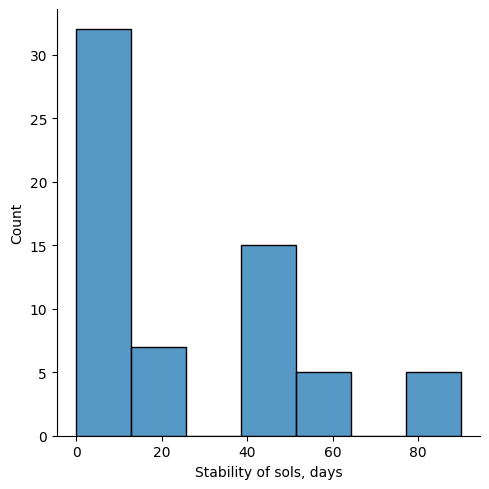

In [11]:
sns.displot(df['Stability of sols, days'])

In [12]:
X = df.drop(['Composition mixtures', 'Contents, %', 'd, nm', 'Stability of sols, days'], axis=1)
y_days = df['Stability of sols, days']
y_d = df['d, nm']
y_content = df['Contents, %']

In [13]:
X

,"t, °С","t, min","с(acid), mol/l","с(Ti4+), mol/l"
0,45,60,4.0,0.50
1,80,10,4.0,0.50
2,45,20,4.0,0.50
3,45,20,4.0,0.47
4,50,20,4.0,0.20
...,...,...,...,...
59,70,12,0.1,0.62
60,70,12,0.1,0.59
61,70,12,0.1,0.55
62,70,12,0.1,0.52


# Random forest feature importance prediction

## Useful functions

In [23]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]


In [24]:
def draw_importance(importances, model_name, columns=X.columns):
    features = {}
    color1 = "#2D466D"
    color2 = "#A2B0C5"
    for i, feature in enumerate(columns):
        features[f"f{i+1}"] = feature

    indices = np.argsort(importances)[::-1]
    num_to_plot = len(columns)
    feature_indices = [ind + 1 for ind in indices[:num_to_plot]]

    print("Feature ranking:")
    for f in range(num_to_plot):
        print(
            "%d. %s %f "
            % (f + 1, features["f" + str(feature_indices[f])], importances[indices[f]])
        )
    plt.figure(figsize=(20, 10))
    bars = plt.bar(
        range(num_to_plot),
        importances[indices[:num_to_plot]],
        color=get_color_gradient(color1, color2, num_to_plot),
        align="center",
    )
    ticks = plt.xticks(range(num_to_plot), feature_indices, fontsize=22)
    plt.yticks(fontsize=22)
    plt.xlim([-1, num_to_plot])
    plt.legend(bars, [u"".join(features["f" + str(i)]) for i in feature_indices], fontsize="24");
    plt.title(f"Feature importance in {model_name}", fontsize=22)
    plt.savefig(f'{artifacts_path}{model_name}.eps', format='eps', dpi=600, bbox_inches='tight', transparent="True", pad_inches=0)
    

In [25]:
def learn_random_forest(X, y, name):
    parameters = {
        'n_estimators': range(100, 500, 100),
        'max_depth': [None] + list(range(3, 11, 2))}

    model = RandomForestRegressor(random_state=42)
    clf = GridSearchCV(
        model, 
        parameters, 
        cv=5, 
        scoring='neg_mean_absolute_error',
        refit=True,
        n_jobs=-1)
    clf.fit(X, y)
    best_random_forest = clf.best_estimator_
    print(clf.best_score_)
    print(clf.best_params_)
    draw_importance(best_random_forest.feature_importances_, f"Random forest {name}")
    return best_random_forest

In [26]:
def learn_gradient_boosting(X, y, name):
    parameters = {
        'learning_rate': [0.5, 0.25, 0.1, 0.05, 0.01],
        'n_estimators': [4, 8, 16, 32, 64, 128],
        'max_depth': range(1, 18, 2)}

    model = GradientBoostingRegressor(random_state=42)
    clf = GridSearchCV(
        model, 
        parameters, 
        cv=5, 
        scoring='neg_mean_absolute_error',
        refit=True,
        n_jobs=-1)
    clf.fit(X, y)
    best_gradient_boost = clf.best_estimator_
    print(clf.best_score_)
    print(clf.best_params_)
    draw_importance(best_gradient_boost.feature_importances_, f"Gradient boost {name}")
    return best_gradient_boost

In [27]:
def learn_xgboost(X, y, name):
    parameters = {
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.5, 1, 1.5, 2, 2.5,],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
    }

    model = xgb.XGBRegressor(learning_rate=0.02, n_estimators=600, nthread=1, seed=0)
    clf = GridSearchCV(
        model, 
        parameters, 
        cv=5, 
        scoring='neg_mean_absolute_error',
        refit=True,
        n_jobs=-1)
    clf.fit(X, y)
    best_xgboost = clf.best_estimator_
    print(clf.best_score_)
    print(clf.best_params_)
    draw_importance(best_xgboost.feature_importances_, f"XGboost {name}")
    return best_xgboost

## Learning

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-17.831149573472338
{'max_depth': 3, 'n_estimators': 400}
Feature ranking:
1. с(Ti4+), mol/l 0.420032 
2. t, min 0.301087 
3. t, °С 0.140705 
4. с(acid), mol/l 0.138176 


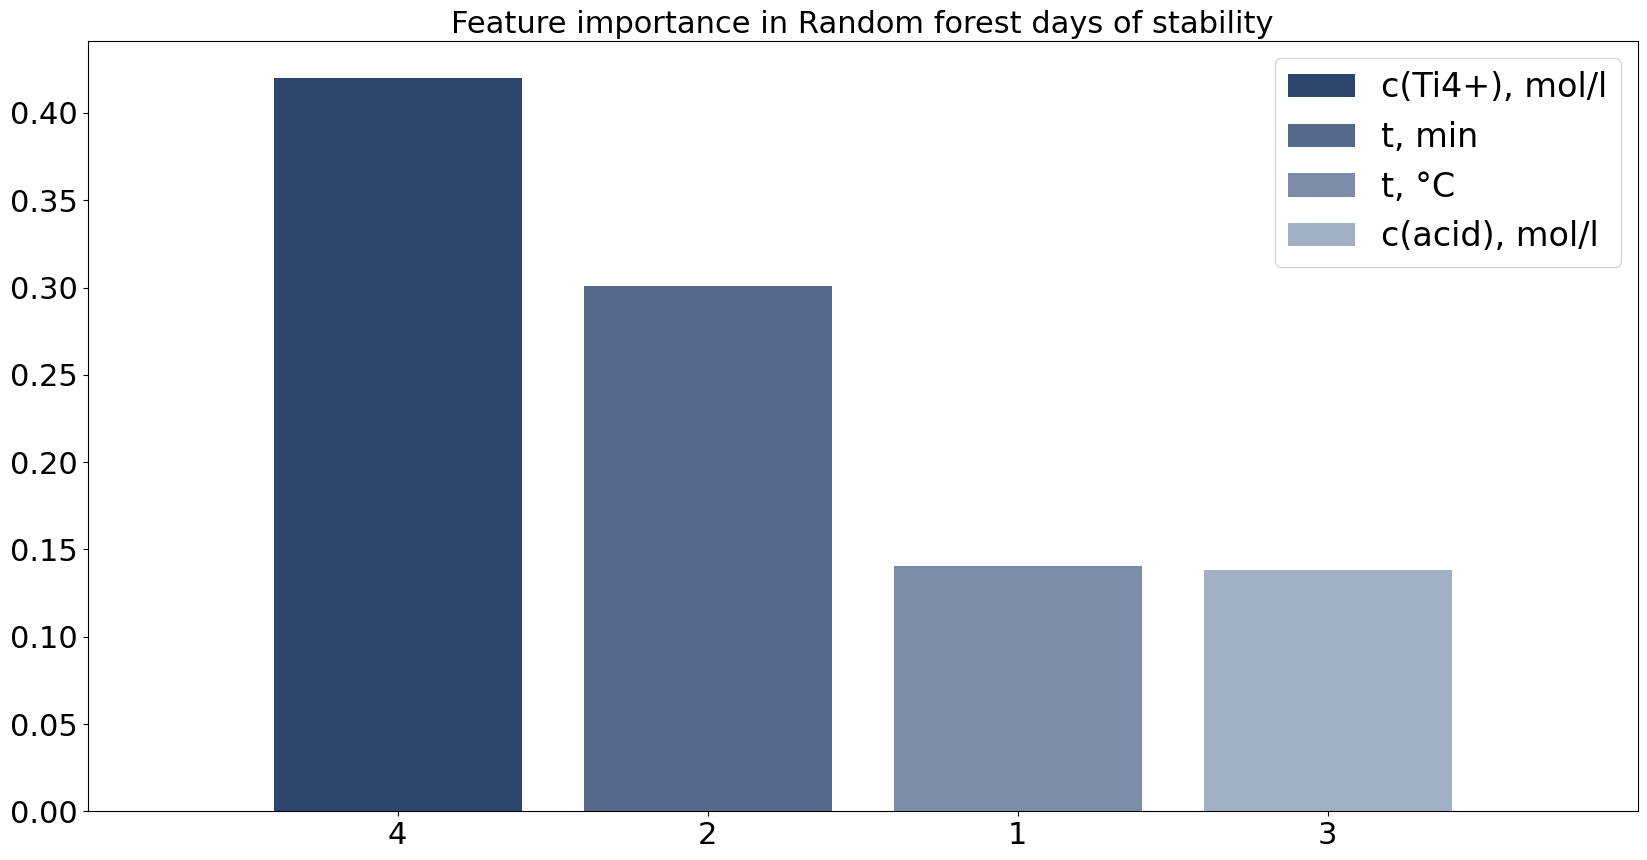

In [32]:
days_rf = learn_random_forest(X, y_days, "days of stability")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-17.739733048940632
{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 128}
Feature ranking:
1. с(Ti4+), mol/l 0.348877 
2. t, min 0.334387 
3. с(acid), mol/l 0.254868 
4. t, °С 0.061867 


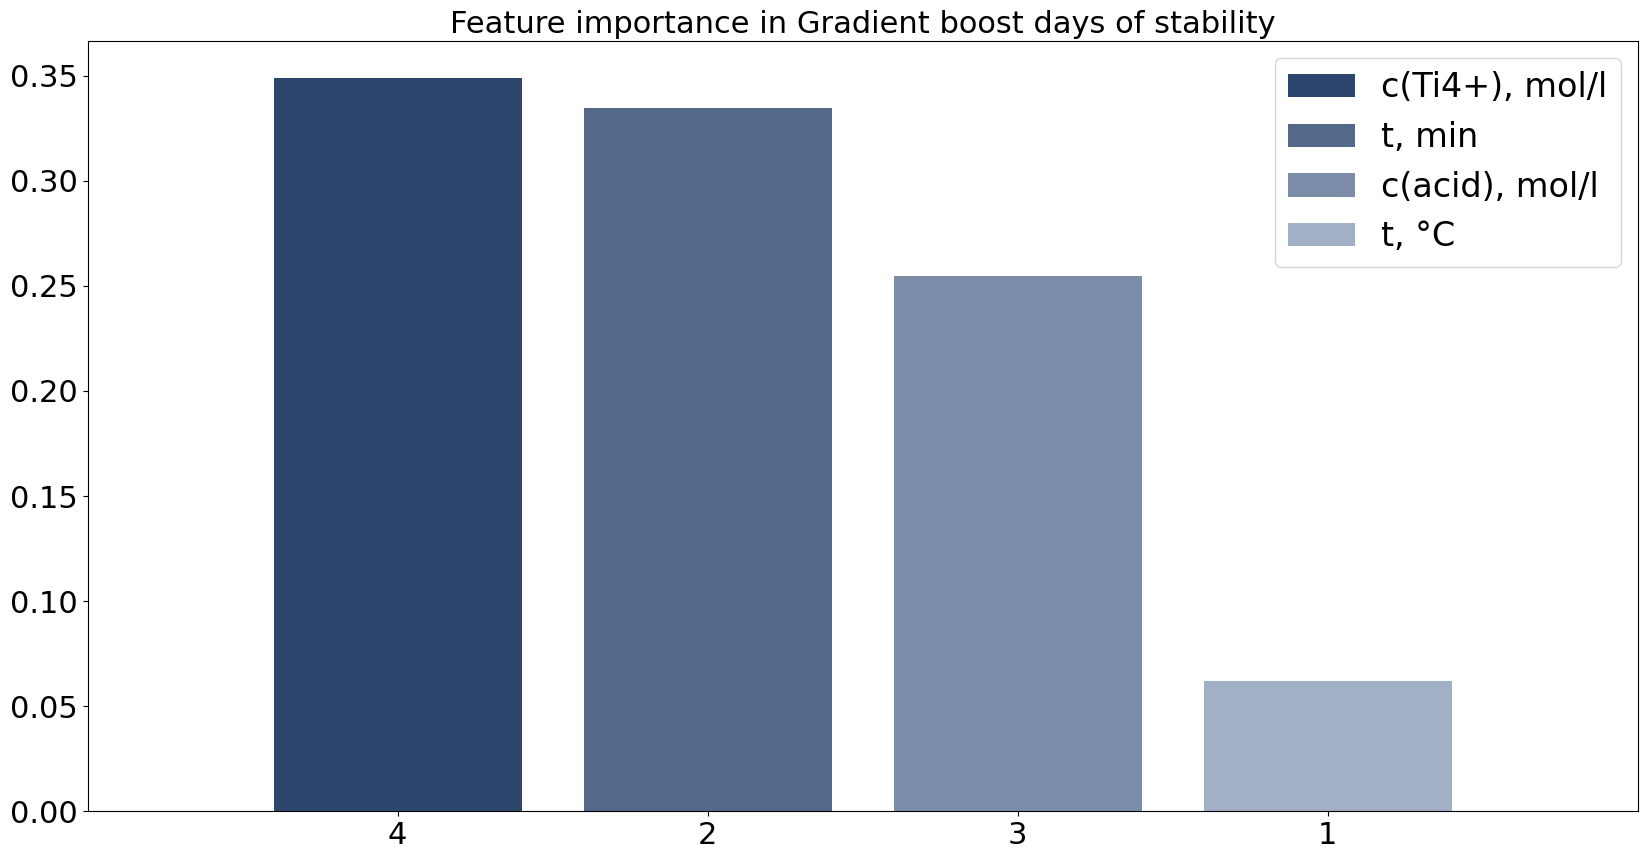

In [33]:
days_grad = learn_gradient_boosting(X, y_days, "days of stability")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-14.997343568924146
{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0}
Feature ranking:
1. с(acid), mol/l 0.330602 
2. с(Ti4+), mol/l 0.274486 
3. t, min 0.242840 
4. t, °С 0.152071 


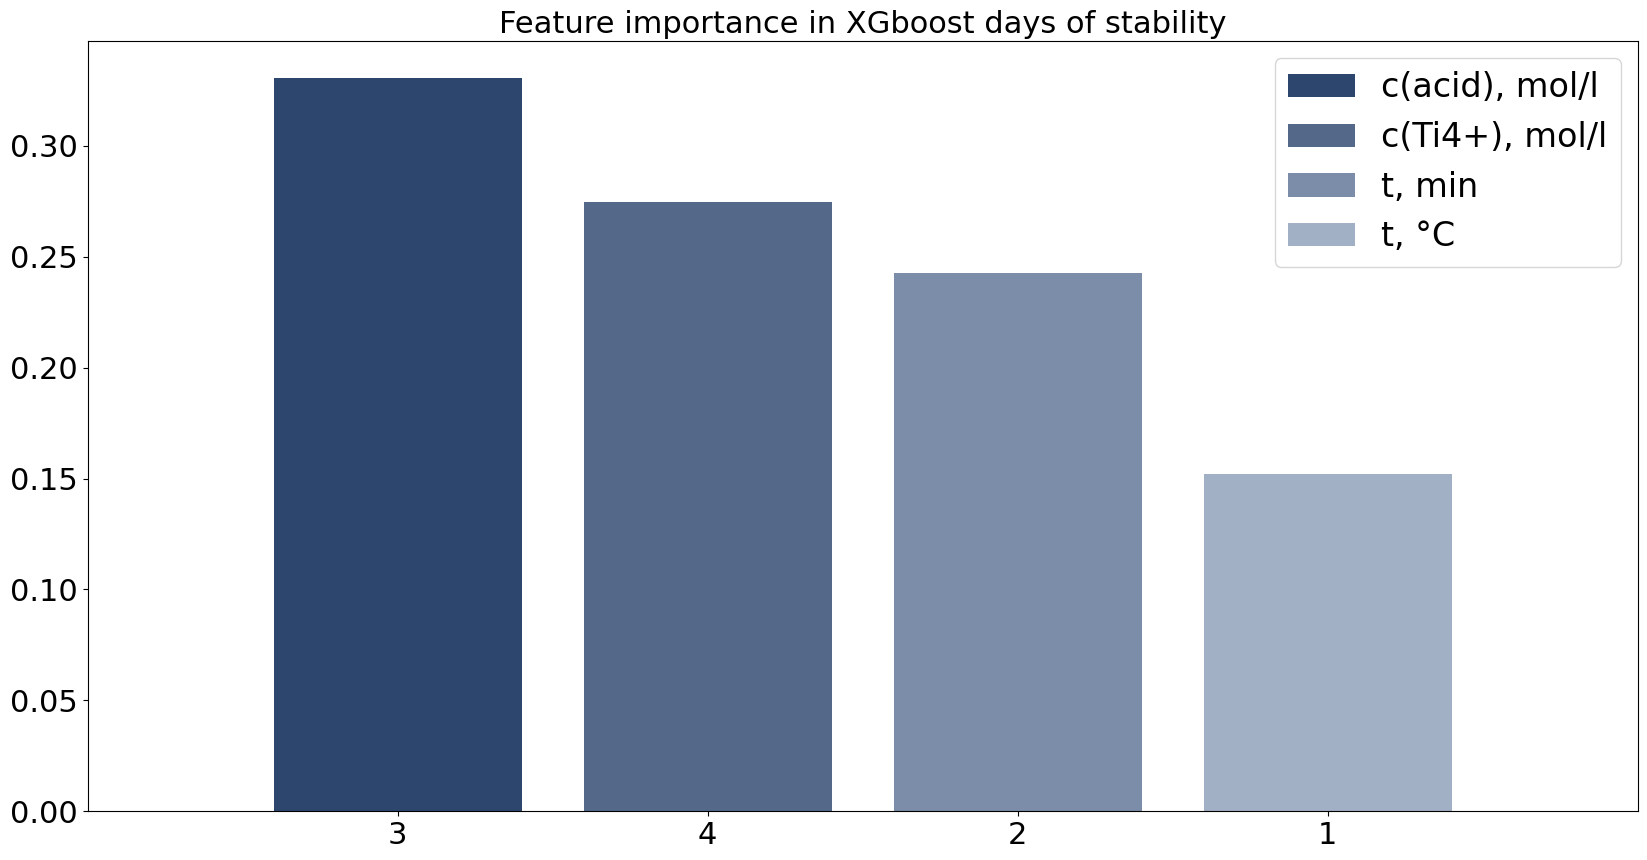

In [34]:
days_xgboost = learn_xgboost(X, y_days, "days of stability")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-663.0220834688613
{'max_depth': 3, 'n_estimators': 100}
Feature ranking:
1. с(Ti4+), mol/l 0.757540 
2. t, min 0.113149 
3. с(acid), mol/l 0.076690 
4. t, °С 0.052621 


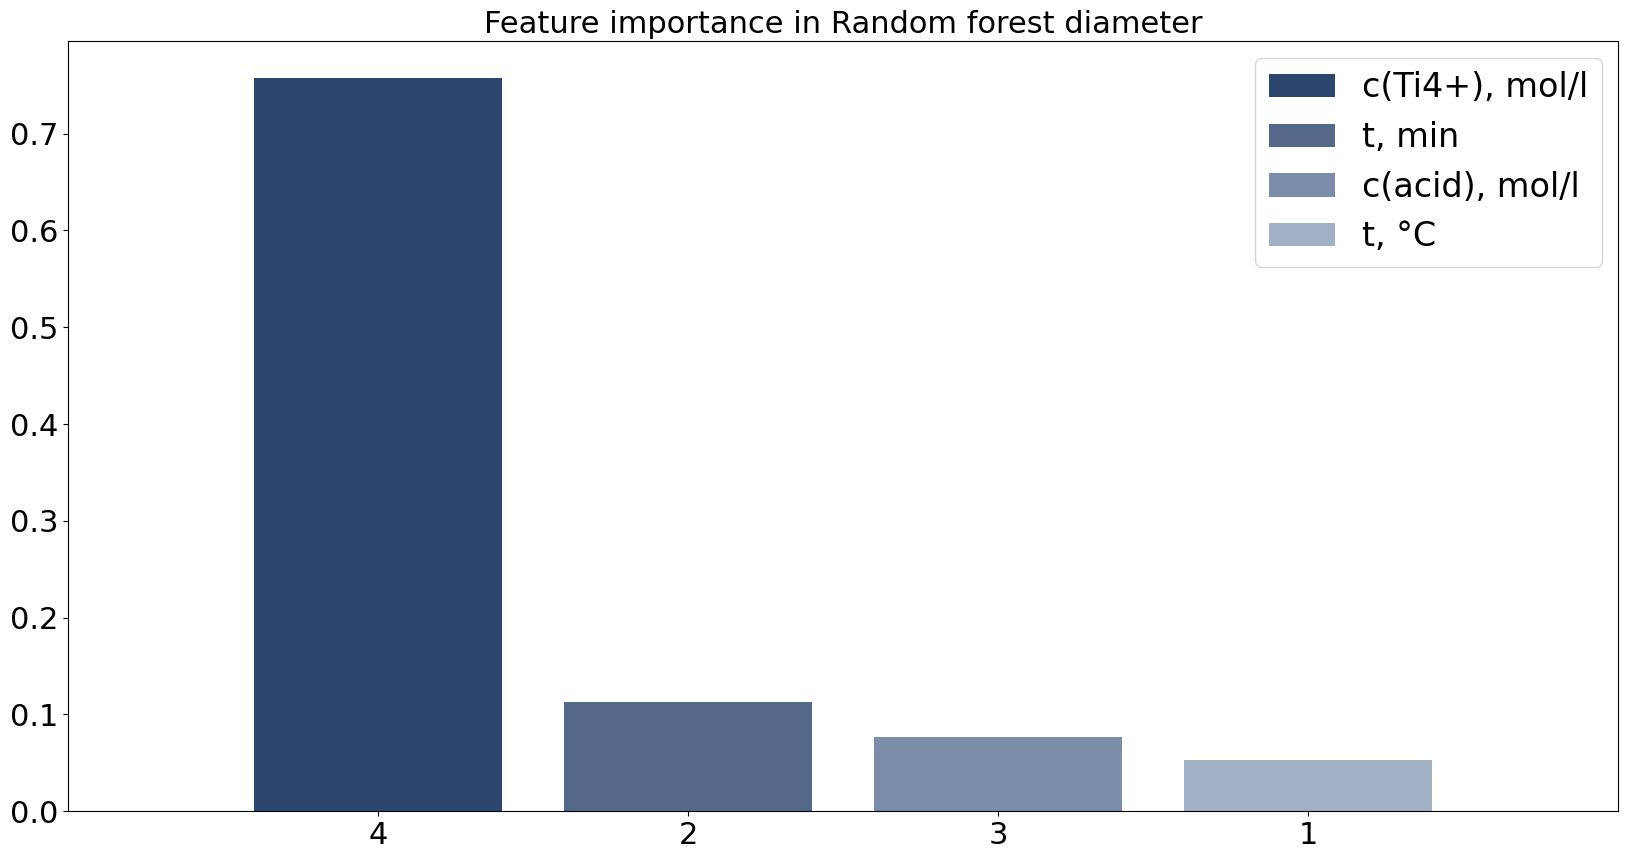

In [46]:
d_rf = learn_random_forest(X, y_d, "diameter")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-543.5611157729148
{'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 4}
Feature ranking:
1. с(Ti4+), mol/l 0.871698 
2. с(acid), mol/l 0.079860 
3. t, min 0.048442 
4. t, °С 0.000000 


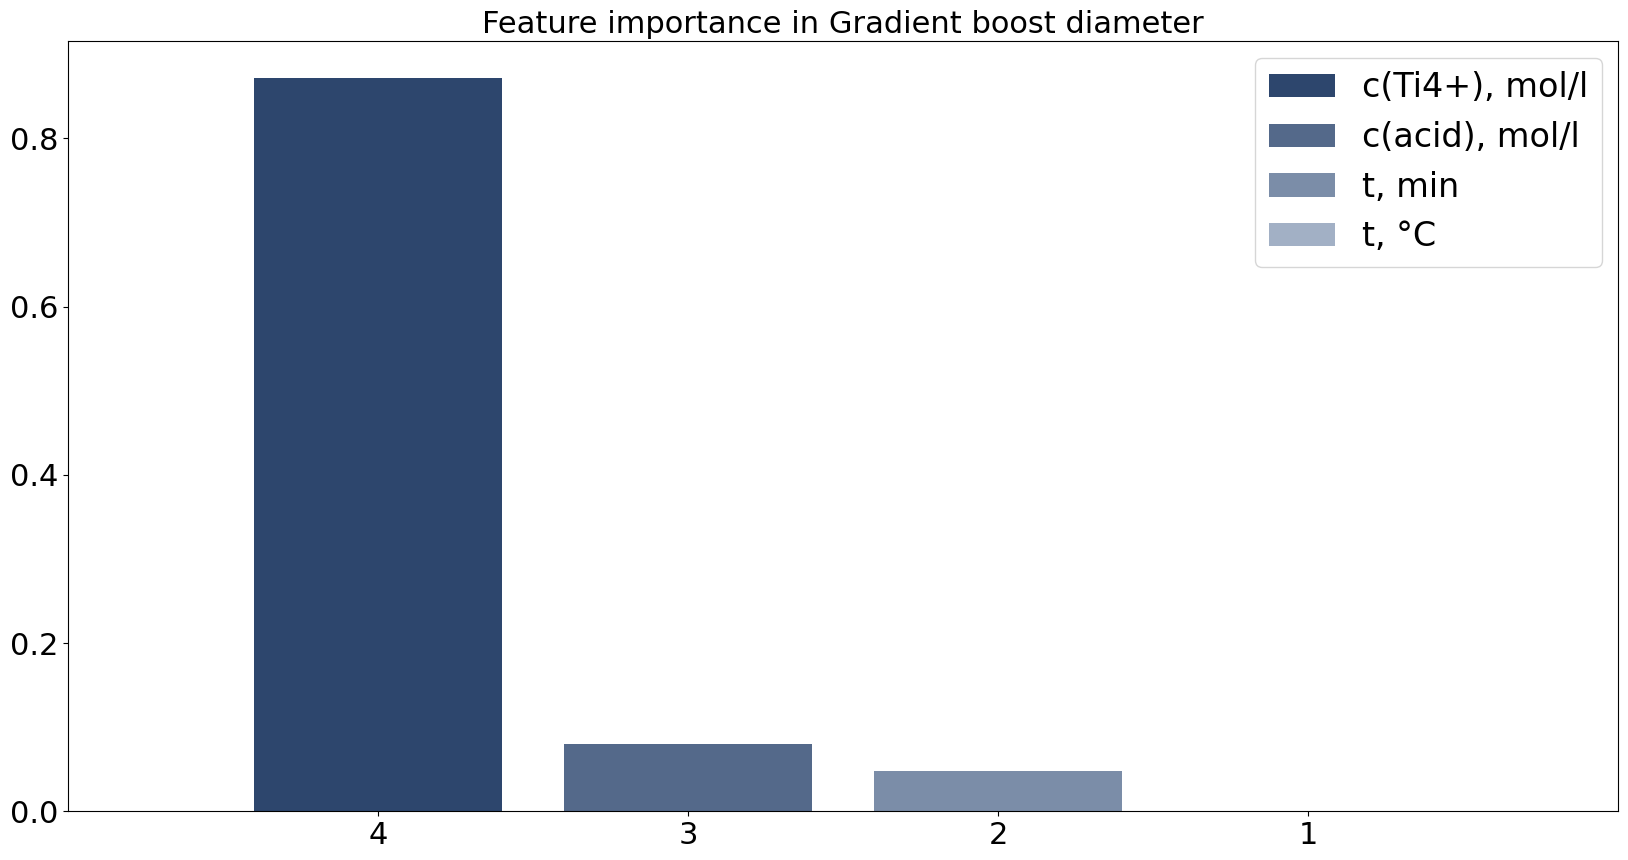

In [36]:
d_grad = learn_gradient_boosting(X, y_d, "diameter")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-491.60461642256513
{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6}
Feature ranking:
1. с(Ti4+), mol/l 0.484347 
2. с(acid), mol/l 0.266485 
3. t, min 0.155036 
4. t, °С 0.094132 


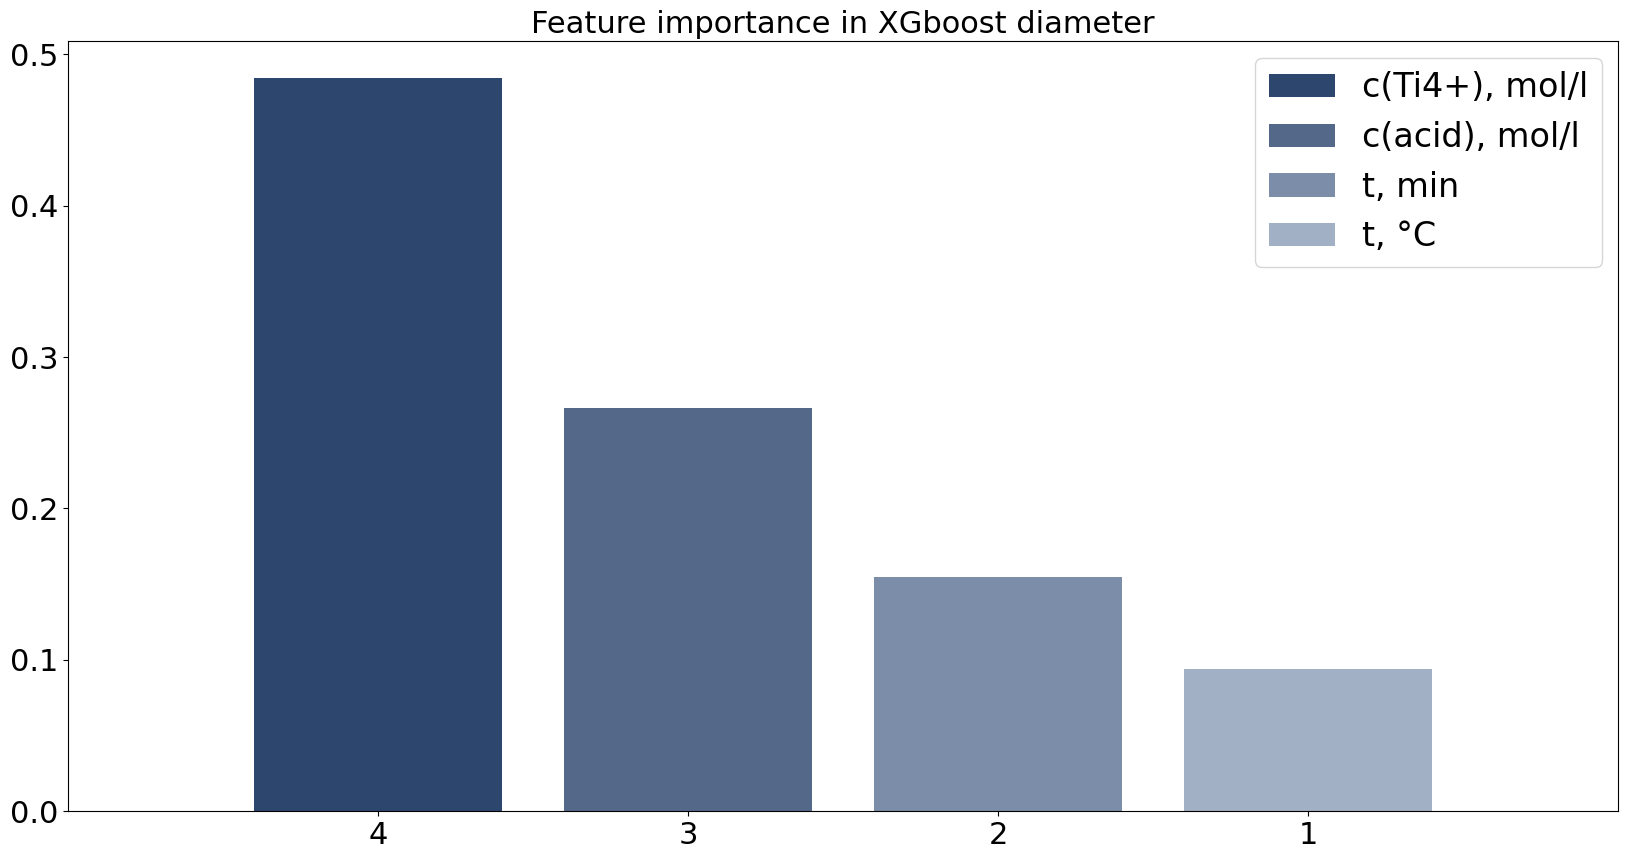

In [37]:
d_xgboost = learn_xgboost(X, y_d, "diameter")

## Shap

In [83]:
def explain(model, X=X, name="model"):
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)
    shap.plots.beeswarm(shap_values, plot_size=[10, 6], show=False)
    plt.savefig(f'{artifacts_path}{name} shap.png', bbox_inches='tight')

### Days of stability

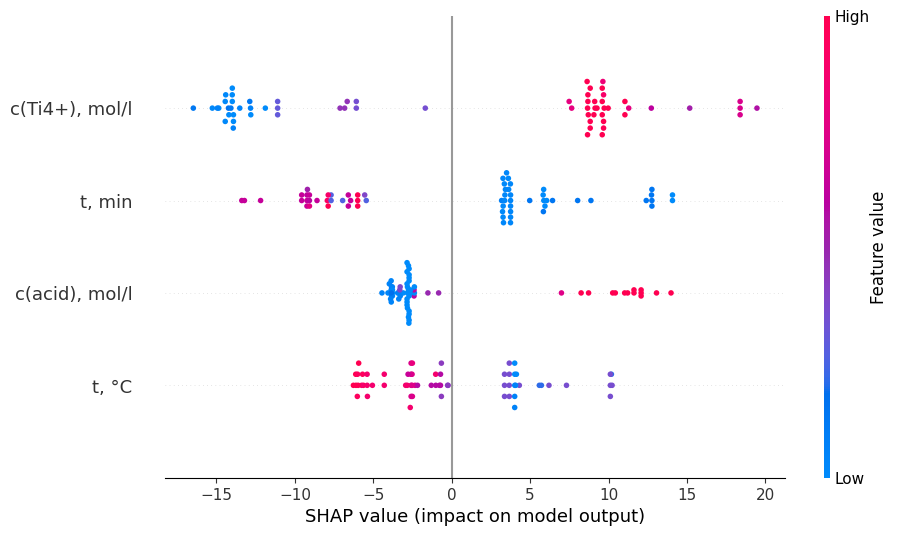

In [84]:
explain(days_rf, name="RandomForest, days of stability")

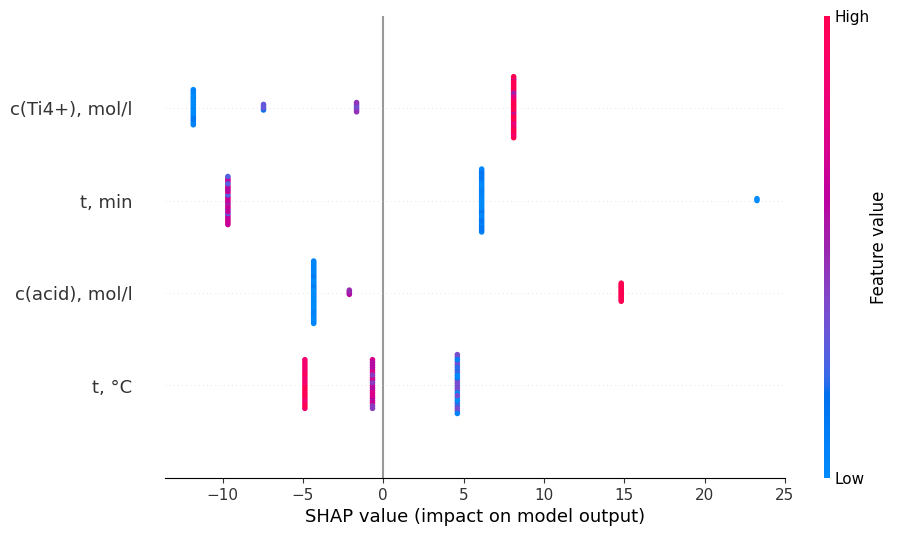

In [85]:
explain(days_grad, name="GradientBoosting, days of stability")

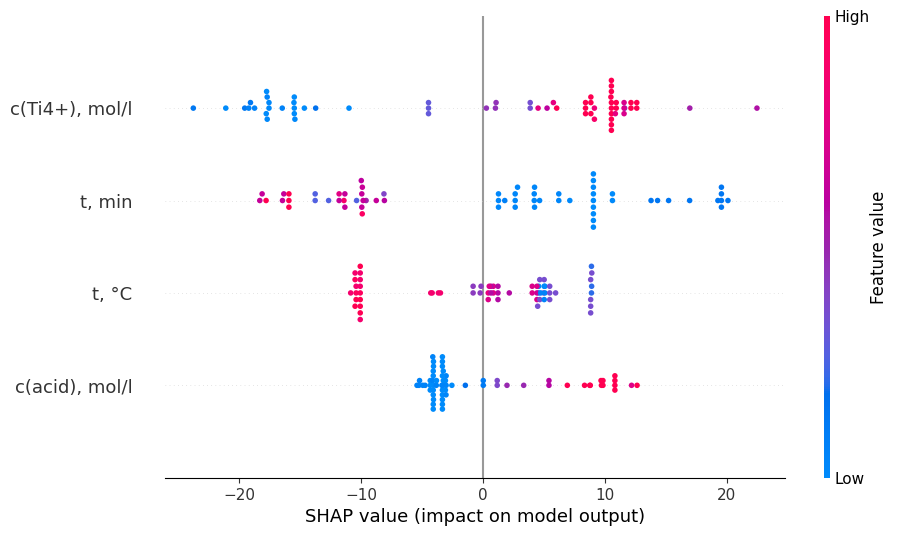

In [86]:
explain(days_xgboost, name="XGBoost, days of stability")

### Diameter of zole

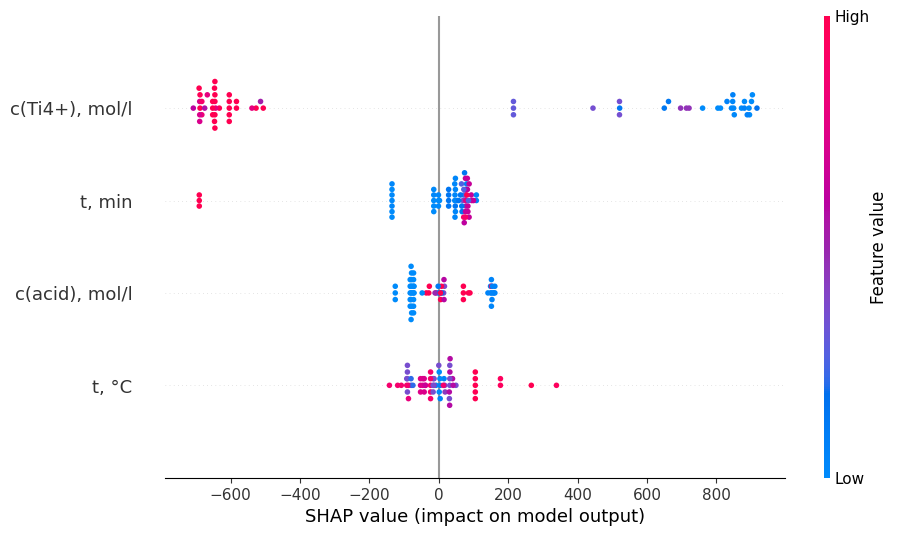

In [87]:
explain(d_rf, name="RandomForest, diameter")

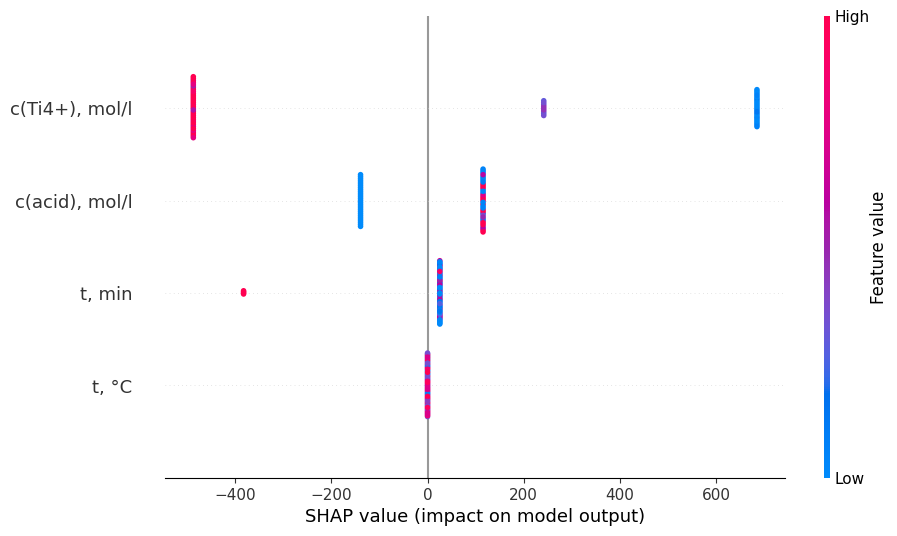

In [88]:
explain(d_grad, name="GradientBoosting, diameter")

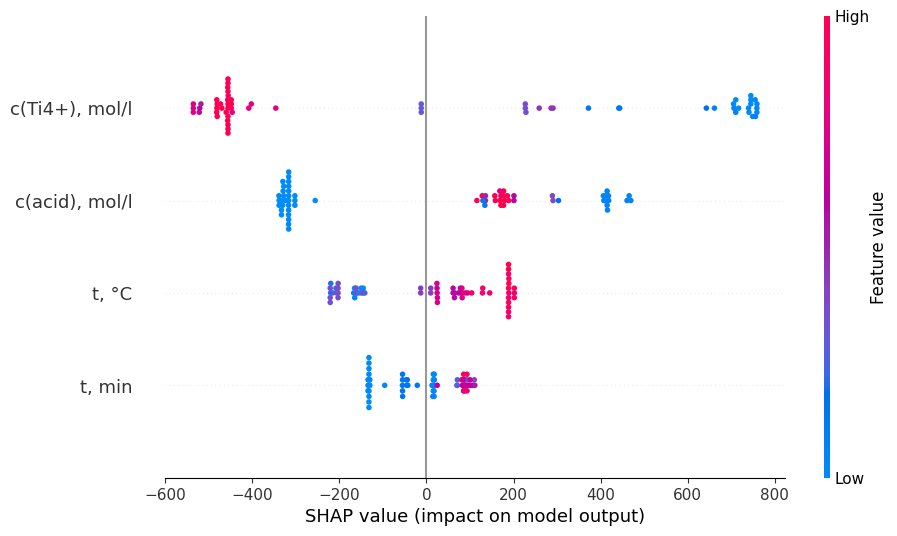

In [89]:
explain(d_xgboost, name="XGBoost, diameter")